<center> <h1>PREDICIÓN DEL SUEÑO ÁRBOLES DE DECISIÓN</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este  notebook se lleva a cabo la construcción de un clasificador de árboles de decisión  de salida multiclase para predecir en distintos sujetos las distintas fases.

    1. Clasficador árboles de decisión multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statistics as stats
from sklearn.model_selection import GridSearchCV
from random import sample
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error

## 1. ÁRBOLES DE DECISIÓN MULTICLASE

Este clasificador árboles de decisión tiene una salida multiclase y clasifica tanto el estado de vigilia como las distintas etapas de sueño ligero y profundo: 0,1,2,3,5.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train.csv')
Test_multi= pd.read_csv('Test.csv')
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

X_test_multi=Test_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_multi=Test_multi['Etiquetas multiclase']

### 1.2 Creación del modelo y selección parámetros libres

In [3]:
clf= tree.DecisionTreeClassifier()
modelo_base=clf.fit(X_train_multi,y_train_multi)

In [4]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 1.3 Búsqueda de parámetros con validación cruzada.

A continuación, se realiza la búsqueda de parámetros: máxima profundidad y minimo número de casos en cada nodo. Con ello, se busca maximizar la exactitud del modelo (accuracy).

In [5]:
max_depth=range(1,20)
min_samples_leaf=range(10,100)

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
tree_grid = GridSearchCV(clf, param_grid=param, scoring= 'accuracy', iid=True,cv=5, n_jobs=-1)
tree_grid.fit(X_train_multi,y_train_multi)
best_parameters = tree_grid.best_params_

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [6]:
# Clasificador con los mejores parámetros
tree_clf=tree_grid.best_estimator_

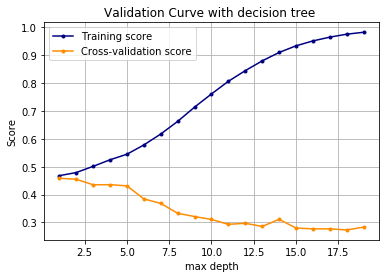

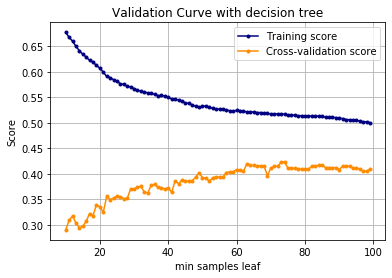

In [7]:
#max depth
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="max_depth", param_range=max_depth, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with decision tree ")
plt.xlabel('max depth')
plt.ylabel("Score")

plt.plot(max_depth, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(max_depth, test_scores_mean, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

#min samples leaf
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="min_samples_leaf", param_range=min_samples_leaf,cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with decision tree")
plt.xlabel('min samples leaf')
plt.ylabel("Score")

plt.plot(min_samples_leaf, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(min_samples_leaf, test_scores_mean, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

In [8]:
print('El par de parámetros estimados por GridSearch que máximiza la accuracy es:',best_parameters)

El par de parámetros estimados por GridSearch que máximiza la accuracy es: {'max_depth': 1, 'min_samples_leaf': 18}


In [9]:
print("Tasa de acierto del modelo base:",modelo_base.score(X_test_multi,y_test_multi))
print("Tasa de acierto con la busqueda de parámetros:",tree_clf.score(X_test_multi,y_test_multi))

#Mejora
print('Mejora  del {:0.2f}%.'.format( 100 * (tree_clf.score(X_test_multi,y_test_multi) - modelo_base.score(X_test_multi,y_test_multi)) / modelo_base.score(X_test_multi,y_test_multi)))

Tasa de acierto del modelo base: 0.29714285714285715
Tasa de acierto con la busqueda de parámetros: 0.43714285714285717
Mejora  del 47.12%.


### 1.4 Evaluación del modelo

In [18]:
predict = tree_clf.predict(X_test_multi)

acc_test= tree_clf.score(X_test_multi, y_test_multi).round(4)
acc_train= tree_clf.score(X_train_multi, y_train_multi).round(4)
print('La exactitud para el modelo de árboles de decisión en el conjunto de TEST es:', acc_test,'\n')
print('La exactitud para el modelo de árboles de decisión en el conjunto de TRAIN es:', acc_train,'\n')

print("Confusion Matrix")
print(confusion_matrix(y_test_multi, predict),'\n')
print("================Classification Report=================")
print(classification_report(y_test_multi, predict))

La exactitud para el modelo de árboles de decisión en el conjunto de TEST es: 0.4371 

La exactitud para el modelo de árboles de decisión en el conjunto de TRAIN es: 0.4717 

Confusion Matrix
[[  1   0  69   0   0]
 [  1   0  45   0   0]
 [  3   0 305   0   0]
 [ 10   0 114   0   0]
 [  0   0 152   0   0]] 

================Classification Report=================
              precision    recall  f1-score   support

         0.0       0.07      0.01      0.02        70
         1.0       0.00      0.00      0.00        46
         2.0       0.45      0.99      0.61       308
         3.0       0.00      0.00      0.00       124
         5.0       0.00      0.00      0.00       152

    accuracy                           0.44       700
   macro avg       0.10      0.20      0.13       700
weighted avg       0.20      0.44      0.27       700



C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
matriz_confusion=pd.crosstab(y_test_multi,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])

In [20]:
matriz_confusion

Resultado del clasificador,0.0,2.0
Clase predicha,,
0.0,1,69
1.0,1,45
2.0,3,305
3.0,10,114
5.0,0,152


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

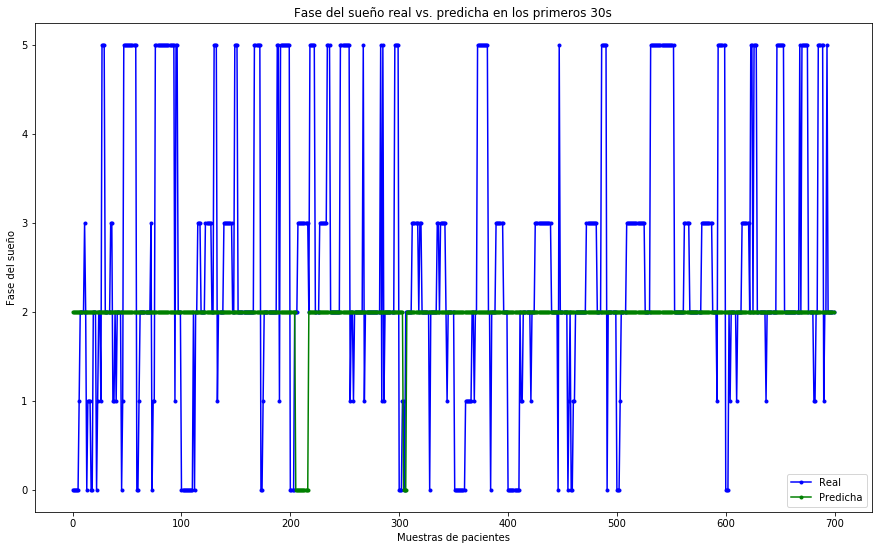

In [21]:
pacientes = len(y_test_multi)
t = np.arange(0,pacientes)
plt.figure(figsize=(15,9))
plt.plot(t,y_test_multi,color='blue', marker='.',label='Real')
plt.plot(t,predict,color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha en los primeros 30s')
plt.xlabel('Muestras de pacientes')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

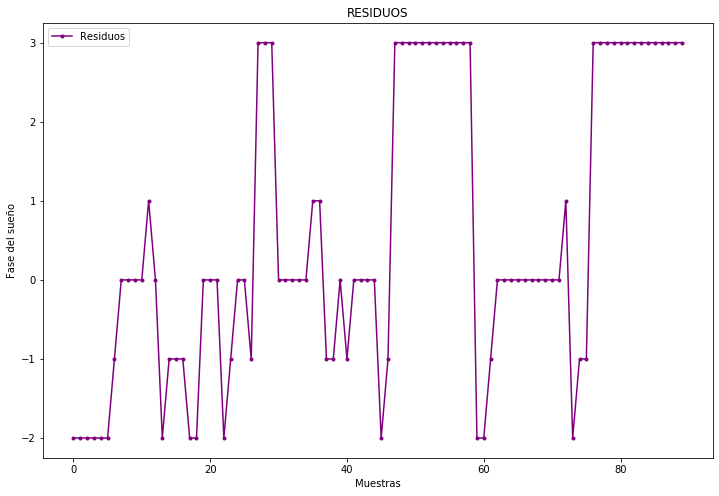

In [22]:
residuos= y_test_multi - predict
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()